In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from mpl_toolkits.mplot3d import Axes3D

In [37]:
X, Y = make_circles(n_samples=500, noise=0.02)

In [38]:
print(X.shape, Y.shape)

(500, 2) (500,)


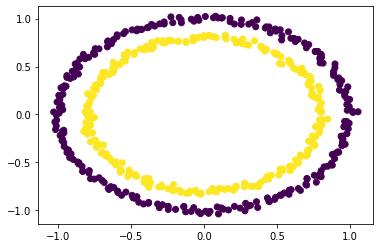

In [39]:
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.show()

### Projection to higher dimension

In [40]:
def phi(X) :
    '''Non Linear Transformation'''
    X1 = X[:, 0]
    X2 = X[:, 1]
    X3 = X1**2 + X2**2
    
    X_ = np.zeros((X.shape[0], 3))
    print(X_.shape)
    X_[:, :-1] = X
    X_[:, -1] = X3
    
    return X_

In [41]:
X_ = phi(X)

(500, 3)


In [42]:
print(X_[:3])

[[-1.00967448  0.13009127  1.03636629]
 [ 0.71461529  0.30938787  0.60639587]
 [-0.46232942 -0.64439864  0.6289981 ]]


In [88]:
def plot3d(X, show=True) :
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    X1 = X[:, 0]
    X2 = X[:, 1]
    X3 = X[:, 2]
    ax.scatter(X1, X2, X3, zdir='z', s=20, c=Y, depthshade=True)
    if show :
        plt.show()
    return ax

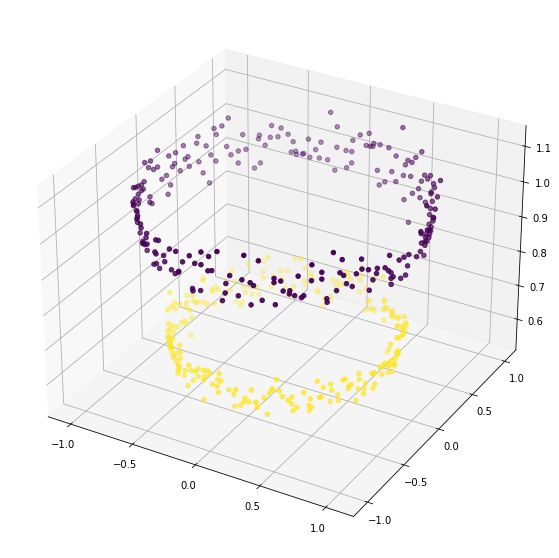

In [89]:
ax = plot3d(X_)

## Logistic Classifier

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [91]:
lr = LogisticRegression()

In [92]:
acc = cross_val_score(lr, X, Y, cv=5).mean()
print("Accuracy X(2D) is %.4f"%(acc*100))

Accuracy X(2D) is 42.6000


In [93]:
acc = cross_val_score(lr, X_, Y, cv=5).mean()
print("Accuracy X(2D) is %.4f"%(acc*100))

Accuracy X(2D) is 100.0000


In [94]:
lr.fit(X_, Y)

LogisticRegression()

In [95]:
wts = lr.coef_

In [96]:
bias = lr.intercept_

In [97]:
xx, yy = np.meshgrid(range(-2, 2), range(-2, 2))
print(xx, yy, sep='\n')

[[-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]]
[[-2 -2 -2 -2]
 [-1 -1 -1 -1]
 [ 0  0  0  0]
 [ 1  1  1  1]]


In [98]:
zz = -(wts[0, 0] * xx + wts[0, 1] * yy + bias) / wts[0, 2]
print(zz)

[[0.83084941 0.82796533 0.82508124 0.82219716]
 [0.82891091 0.82602682 0.82314274 0.82025865]
 [0.8269724  0.82408832 0.82120423 0.81832015]
 [0.82503389 0.82214981 0.81926572 0.81638164]]


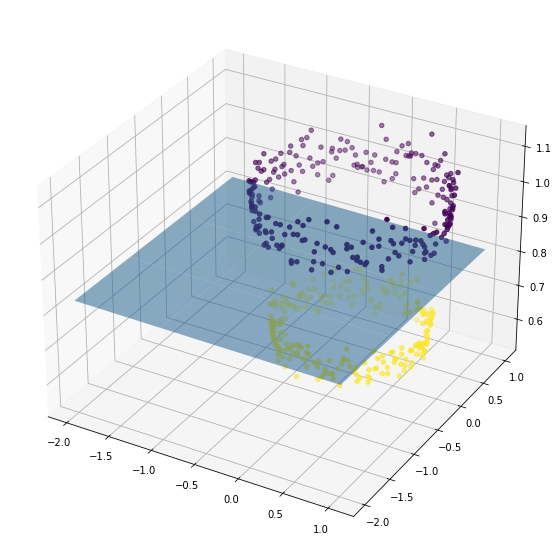

In [112]:
ax = plot3d(X_, False)
ax.plot_surface(xx, yy, zz, alpha=0.5)
plt.show()

## SVM